# Importing Necessary Librariy 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
diabetes = pd.read_csv(r'diabetes.csv')

In [3]:
diabetes.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


### step to be done to  - before Feature Enginerring
# Rename the columns
# CHECK THE MISSING VALUES 
# FIND OUTLIERS ON THE DATASET



In [4]:
print( diabetes.info())
print("------------------------------------")
print(diabetes.shape)
print("__________________________________")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB
None
-------

In [5]:
# Re-Naming the Column of the dataset

diabetes = diabetes.rename(columns= {'id':'patient_id','chol' : 'cholesterol', 
                                                 'stab.glu' : 'stabilze_glucosbin' , 'hdl' :'HDI', 'glyhb' : 'gluobin_hemoglobin' , 
                                                 'waist' : 'body_circumference' , 'hip' : 'HIP' , 'time.ppn' : 'time_digestion' , 
                                                 'bp.1s' : 'blood_ps_1_systolic',
                                                 'bp.1d' : 'blood_ps_1_diastolic',
                                                 'bp.2s' : 'blood_ps_2_systolic',
                                                 'bp.2d' : 'blood_ps_2_disatolic'})

In [6]:
diabetes.head()

,patient_id,cholesterol,stabilze_glucosbin,HDI,ratio,gluobin_hemoglobin,location,age,gender,height,weight,frame,blood_ps_1_systolic,blood_ps_1_diastolic,blood_ps_2_systolic,blood_ps_2_disatolic,body_circumference,HIP,time_digestion
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0



# Handling missing values [handled] 


In [7]:
Missing_values_columns =  diabetes.columns[diabetes.isna().sum()>0]
print("Missing values specific column")
print("------------------------------")
print(Missing_values_columns)

Missing values specific column
------------------------------
Index(['cholesterol', 'HDI', 'ratio', 'gluobin_hemoglobin', 'height', 'weight',
       'frame', 'blood_ps_1_systolic', 'blood_ps_1_diastolic',
       'blood_ps_2_systolic', 'blood_ps_2_disatolic', 'body_circumference',
       'HIP', 'time_digestion'],
      dtype='object')


In [8]:
# Filling data in missing  - actually we have less data - so we have fillna column  -for perdict using mean

col = ['cholesterol','gluobin_hemoglobin','blood_ps_1_systolic', 'blood_ps_1_diastolic',
       'blood_ps_2_systolic', 'blood_ps_2_disatolic','height']

diabetes[col] = diabetes[col].fillna(diabetes[col].mean())



In [9]:
diabetes['frame'].fillna(diabetes['frame'].mode()[0], inplace=True)

C:\Users\Test\AppData\Local\Temp\ipykernel_13088\3222537295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes['frame'].fillna(diabetes['frame'].mode()[0], inplace=True)


In [10]:
col_drop_rows = ['HDI', 'ratio', 'weight', 'body_circumference', 'HIP','time_digestion']
diabetes.dropna(subset=col_drop_rows , inplace=True)


In [11]:
print(diabetes.isna().sum())
print("__________________________________")
print(diabetes.shape)
print("----------------------------------")

patient_id              0
cholesterol             0
stabilze_glucosbin      0
HDI                     0
ratio                   0
gluobin_hemoglobin      0
location                0
age                     0
gender                  0
height                  0
weight                  0
frame                   0
blood_ps_1_systolic     0
blood_ps_1_diastolic    0
blood_ps_2_systolic     0
blood_ps_2_disatolic    0
body_circumference      0
HIP                     0
time_digestion          0
dtype: int64
__________________________________
(396, 19)
----------------------------------


In [12]:
diabetes.head()

,patient_id,cholesterol,stabilze_glucosbin,HDI,ratio,gluobin_hemoglobin,location,age,gender,height,weight,frame,blood_ps_1_systolic,blood_ps_1_diastolic,blood_ps_2_systolic,blood_ps_2_disatolic,body_circumference,HIP,time_digestion
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,152.382979,92.524823,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,152.382979,92.524823,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.000000,92.000000,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,152.382979,92.524823,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,152.382979,92.524823,44.0,41.0,300.0


In [13]:
col = ['blood_ps_2_systolic','blood_ps_2_disatolic']

diabetes[col] = diabetes[col].astype(int)

In [14]:
diabetes['diabetes'] = ((diabetes['gluobin_hemoglobin'] > 6.5)|(diabetes['stabilze_glucosbin'] > 126)|
                                (diabetes['time_digestion'] > 200 )).astype(int)

In [15]:
diabetes.head()

,patient_id,cholesterol,stabilze_glucosbin,HDI,ratio,gluobin_hemoglobin,location,age,gender,height,weight,frame,blood_ps_1_systolic,blood_ps_1_diastolic,blood_ps_2_systolic,blood_ps_2_disatolic,body_circumference,HIP,time_digestion,diabetes
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,152,92,29.0,38.0,720.0,1
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,152,92,46.0,48.0,360.0,1
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185,92,49.0,57.0,180.0,0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,152,92,33.0,38.0,480.0,1
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,152,92,44.0,41.0,300.0,1


In [16]:
diabetes.shape

(396, 20)

##  [ EDA - Outlier  - check  - either data have or not ]


In [17]:
# using heatmap  - check which column contribute or relationship is strong to diabetes - will considere for model
diabete = diabetes.select_dtypes(include=['number'])
corr_matrix = diabete.corr()

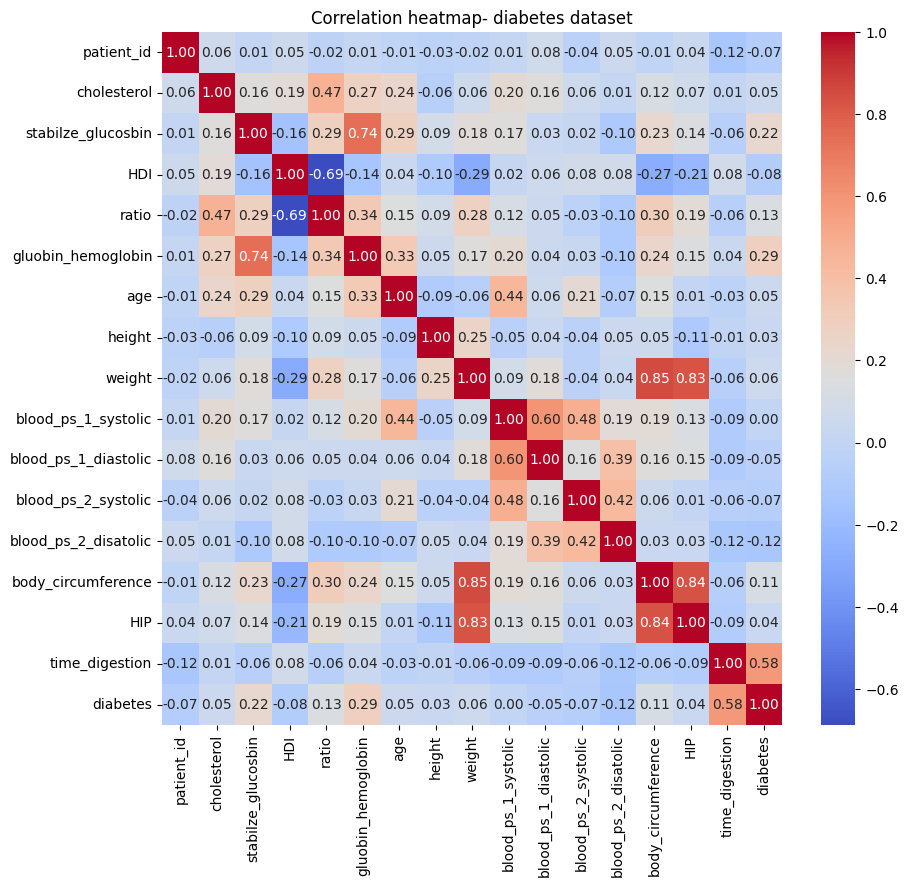

In [18]:
plt.figure(figsize=(10,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm' , fmt=".2f")
plt.title("Correlation heatmap- diabetes dataset")
plt.show()

# outlier detection and remove if necessary 


In [19]:
diabetes.head()

,patient_id,cholesterol,stabilze_glucosbin,HDI,ratio,gluobin_hemoglobin,location,age,gender,height,weight,frame,blood_ps_1_systolic,blood_ps_1_diastolic,blood_ps_2_systolic,blood_ps_2_disatolic,body_circumference,HIP,time_digestion,diabetes
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,152,92,29.0,38.0,720.0,1
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,152,92,46.0,48.0,360.0,1
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185,92,49.0,57.0,180.0,0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,152,92,33.0,38.0,480.0,1
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,152,92,44.0,41.0,300.0,1


C:\Users\Test\AppData\Local\Temp\ipykernel_13088\3596720619.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes['time_digestion'])


<Axes: xlabel='time_digestion', ylabel='Density'>

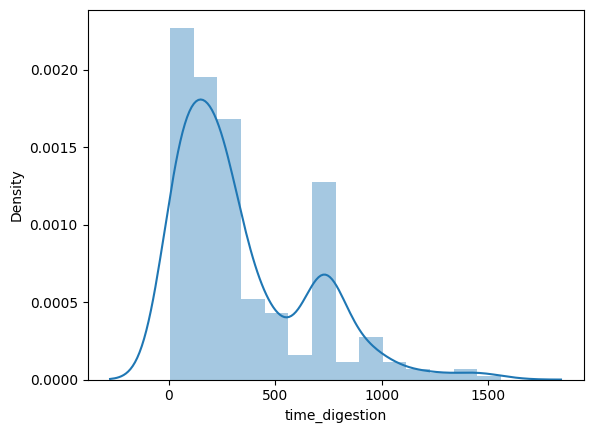

In [20]:
# stabilze_glucosbin ,gluobin_hemoglobin,time_digestion,cholesterol
sns.distplot(diabetes['time_digestion'])

In [21]:
def outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper = q3 + 1.5* iqr
    lower = q1 - 1.5* iqr
    outlier_summary = df[(df[col] >=lower) & (df[col] <= upper)]
    return outlier_summary 

In [22]:
# stabilze_glucosbin ,gluobin_hemoglobin,time_digestion,cholesterol
cleaned_col = outlier(diabetes,'time_digestion')

C:\Users\Test\AppData\Local\Temp\ipykernel_13088\2593750805.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_col['time_digestion'])


<Axes: xlabel='time_digestion', ylabel='Density'>

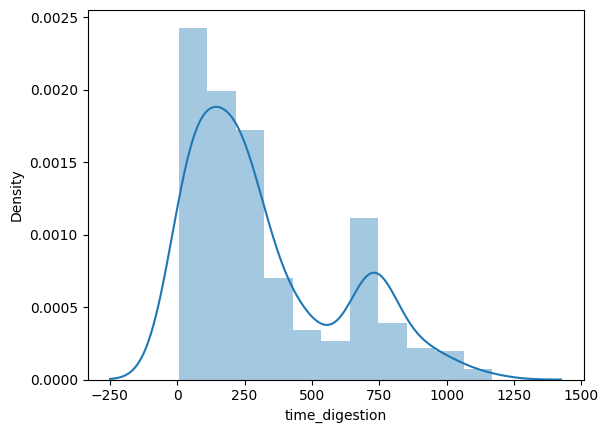

In [23]:
# stabilze_glucosbin ,gluobin_hemoglobin,time_digestion,cholesterol
sns.distplot(cleaned_col['time_digestion'])

## Preprocessing part 

In [24]:
diabetes.head()

,patient_id,cholesterol,stabilze_glucosbin,HDI,ratio,gluobin_hemoglobin,location,age,gender,height,weight,frame,blood_ps_1_systolic,blood_ps_1_diastolic,blood_ps_2_systolic,blood_ps_2_disatolic,body_circumference,HIP,time_digestion,diabetes
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,152,92,29.0,38.0,720.0,1
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,152,92,46.0,48.0,360.0,1
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185,92,49.0,57.0,180.0,0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,152,92,33.0,38.0,480.0,1
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,152,92,44.0,41.0,300.0,1


In [25]:
from sklearn.preprocessing import StandardScaler

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split , cross_val_score

## Train&Test split 

In [36]:
# basis on corelation which highly correlation between diabetes this three column 
#

x = diabetes[['stabilze_glucosbin','time_digestion','gluobin_hemoglobin']]
y = diabetes['diabetes']

In [42]:
X_train , X_test , Y_train , Y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(316, 3) (80, 3)
(316,) (80,)


In [45]:
scaler  = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
X_train_scaled_frame = pd.DataFrame(X_train_scaled,columns=X_train.columns, index=X_train.index)
x_test_scaled_frame = pd.DataFrame(X_test_scaled,columns=X_test.columns, index=X_test.index)

In [75]:
Model = SVC(kernel='linear')

In [76]:
Model.fit(X_train_scaled_frame,Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [77]:
print(f'Intercept : {Model.intercept_}')
print(f'Co_efficient : {Model.coef_}')

Intercept : [3.7340376]
Co_efficient : [[1.07138534 5.61635666 1.1567157 ]]


## Prediction

In [78]:
y_pred = Model.predict(x_test_scaled_frame)

## Metrics

# After Evalution Metrics  - accuracy_score is 90% and matrix is also good performing

In [60]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [79]:
print(f' accuracy_score : {accuracy_score(Y_test,y_pred)}')

 accuracy_score : 0.9125


In [80]:
print(f'confusion_matrix : {confusion_matrix(Y_test,y_pred)}')

confusion_matrix : [[24  4]
 [ 3 49]]


In [81]:
print(f'classification_report : {classification_report(Y_test,y_pred)}')

classification_report :               precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.92      0.94      0.93        52

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



In [83]:
## Cross validation
scores = cross_val_score(Model , x,y, cv=5 , scoring='accuracy')

In [84]:
print(f'Cross_val_score : {scores}')
print(f' Mean_accuracy : {scores.mean()}')

Cross_val_score : [0.9375     0.97468354 0.97468354 0.96202532 0.94936709]
 Mean_accuracy : 0.9596518987341771


In [85]:
#- I validated my model with 5‑fold cross‑validation and achieved ~96% mean accuracy, with consistent fold scores.”